# Perkenalan

## Team :
1. Nichoulaus Verdhy P - PYTN-KS011-023
2. Tassyirifiyya - PYTN-KS011-012
3. Isma - PYTN-KS011-008

Python for Data Science - Studi Independen - Kampus Merdeka

## Latar Belakang

Dataset WeatherAUS adalah dataset yang berisi data cuaca di beberapa kota di Australia selama beberapa tahun. Data diambil dari Australian Bureau of Meteorology dan terdiri dari informasi cuaca harian seperti suhu, kelembaban, kecepatan angin, dan curah hujan, Dataset ini sering digunakan dalam analisis prediksi cuaca.

Tujuan utama dari dataset ini adalah untuk memprediksi apakah akan terjadi hujan pada hari berikutnya berdasarkan data cuaca pada hari sebelumnya. Variabel target dalam dataset ini adalah "RainTomorrow" yang menunjukkan apakah akan hujan atau tidak pada hari berikutnya. Selain itu, dataset ini juga berisi beberapa variabel input seperti lokasi, tanggal, suhu maksimum dan minimum, kelembaban, tekanan udara, dan kecepatan angin.

Beberapa contoh analisis dan prediksi yang dapat dilakukan dengan dataset WeatherAUS adalah:

1. Prediksi apakah akan turun hujan pada hari berikutnya 

2. Analisis hubungan antara curah hujan dan faktor-faktor cuaca lainnya seperti suhu, kelembapan, dan arah angin 

3. Analisis pola cuaca di berbagai wilayah di Australia

4. Prediksi curah hujan bulanan di suatu wilayah di Australia 

5. Analisis perubahan cuaca di Australia selama sepuluh tahun terakhir 

Dataset WeatherAUS penting karena dapat membantu dalam memprediksi cuaca di masa depan dan membantu orang dalam membuat keputusan yang tepat, seperti memilih pakaian yang sesuai, membawa payung Dan lain-lain

## Objektif

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:

● Mampu memahami konsep Classification dengan Logistic Regression dan SVM

● Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM

● Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

# Import Pustaka

In [2]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi

# Data Loading

## Memanggil Data set

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Melihat ukuran data(baris, kolom)

In [5]:
df.shape

(145460, 23)

## Pengecekan Nama Kolom

In [6]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

## Deskriptif Statistik

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Tipe Data


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Penjelasan Per kolom

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

## Pengecekan Missing Value

In [9]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Penghitungan Persentasi Missing Value

In [10]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df[col])
    perc_missing = (null_count / total_count) * 100
    
    print(f"Kolom {col}:")
    print(f"Jumlah nilai null: {null_count}")
    print(f"Total data: {total_count}")
    print(f"Persentase missing value: {perc_missing:.2f}%\n")

Kolom Date:
Jumlah nilai null: 0
Total data: 145460
Persentase missing value: 0.00%

Kolom Location:
Jumlah nilai null: 0
Total data: 145460
Persentase missing value: 0.00%

Kolom MinTemp:
Jumlah nilai null: 1485
Total data: 145460
Persentase missing value: 1.02%

Kolom MaxTemp:
Jumlah nilai null: 1261
Total data: 145460
Persentase missing value: 0.87%

Kolom Rainfall:
Jumlah nilai null: 3261
Total data: 145460
Persentase missing value: 2.24%

Kolom Evaporation:
Jumlah nilai null: 62790
Total data: 145460
Persentase missing value: 43.17%

Kolom Sunshine:
Jumlah nilai null: 69835
Total data: 145460
Persentase missing value: 48.01%

Kolom WindGustDir:
Jumlah nilai null: 10326
Total data: 145460
Persentase missing value: 7.10%

Kolom WindGustSpeed:
Jumlah nilai null: 10263
Total data: 145460
Persentase missing value: 7.06%

Kolom WindDir9am:
Jumlah nilai null: 10566
Total data: 145460
Persentase missing value: 7.26%

Kolom WindDir3pm:
Jumlah nilai null: 4228
Total data: 145460
Persentase 

## Pengecekan Data yang duplikat untuk semua kolom

In [11]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [12]:
df.duplicated().sum()

0

# Data Cleansing

## Mengubah Format DataTime

In [13]:
df["Date"]=pd.to_datetime(df["Date"])

### Melakukan pengecekan ulang missing data

In [14]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### menghilangkan missing value pada dataset, melakukan normalisasi pada dataset dengan cara melakukan dropping nilai null pada variabel target terlebih dahulu.

In [15]:
#Dropping the null values in dependent variable
#Use df1 veriable for train data
df = df[df['RainTomorrow'].notna()]   #This is our training data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Selanjutnya melakukan pengelompokkan category variable data dan melakukan pengisian nilai

In [16]:
# find categorical variables

category = [var for var in df.columns if df[var].dtype=='O']

print('There are {} category variables\n'.format(len(category)))

print('Category Variables :', category)

There are 6 category variables

Category Variables : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
category

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [18]:
df[category].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [19]:
#replacing null values in categorical variables with mode value
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

Selanjutnya melakukan pengelompokkan numerik data dan pengisian nilai

In [20]:
# find categorical variables

numerik = [var for var in df.columns if df[var].dtype!='O']

print('There are {} category variables\n'.format(len(numerik)))

print('categorical numerik :', numerik)

There are 17 category variables

categorical numerik : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [21]:
numerik

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [22]:
df[numerik].head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [23]:
#filling the null values in numerical variable with mean
df = df.fillna(df.mean())
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18516\3809857404.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18516\3809857404.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [24]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Explorasi data Analist

## Analisa Rainfall Berdasarkan Tiap Bulannya dari TAhun

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 720x576 with 0 Axes>

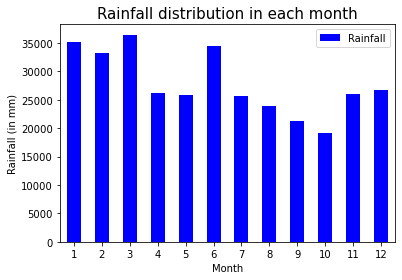

In [25]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
rainfall =[df['Date'].dt.year, df['Date'].dt.month, df['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(10,8))
a = rainfall_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='blue')
plt.title('Rainfall distribution in each month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

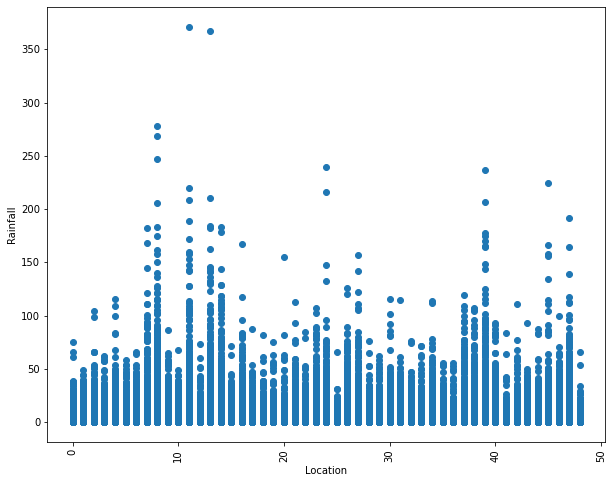

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(df['Location'],df['Rainfall'])
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.show()

## Perbandingan MinTEmp MaxTempd engan Lokasi

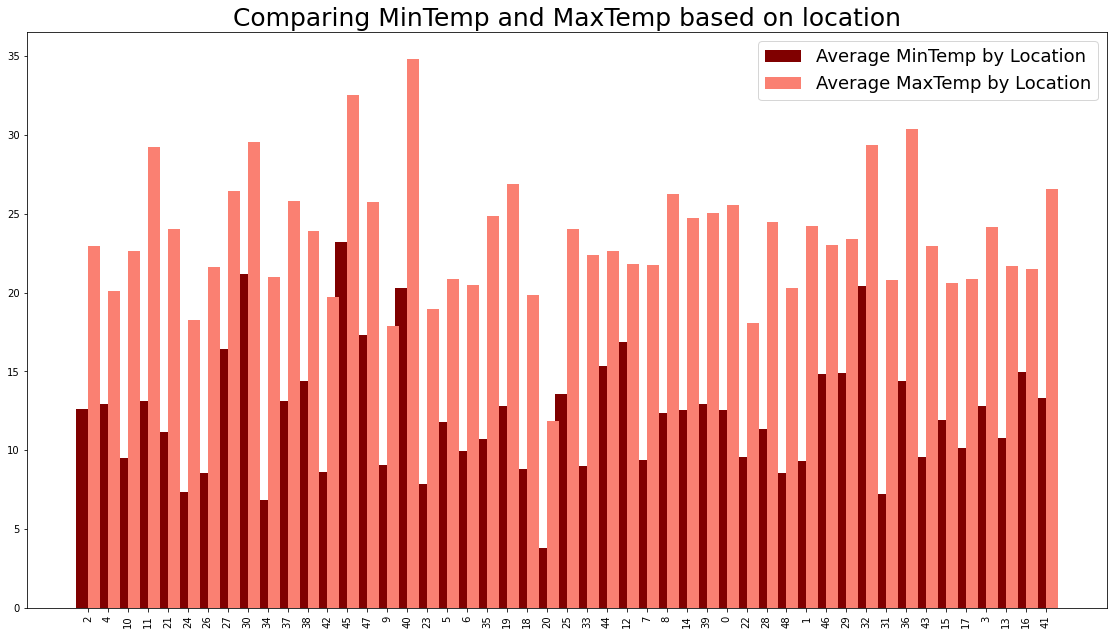

In [35]:
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing MinTemp and MaxTemp based on location", fontsize=25)
plt.legend(fontsize=18)

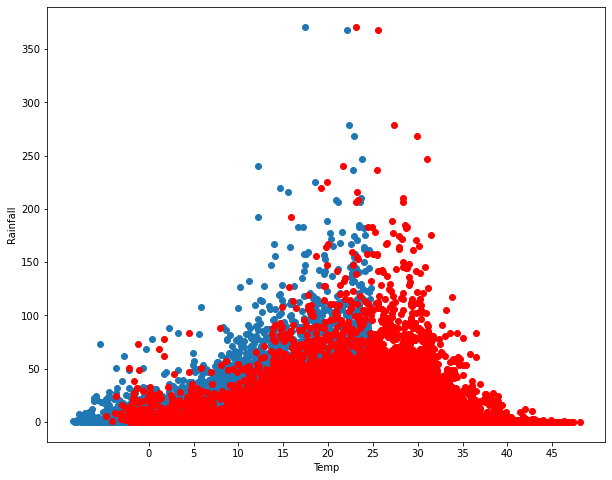

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(df['MinTemp'],df['Rainfall'])
plt.scatter(df['MaxTemp'],df['Rainfall'], color="Red")
plt.xlabel("Temp")
plt.xticks(range(0,50,5))
plt.ylabel("Rainfall")
plt.show()

## Komparasi Berdasarkan Tahun

In [37]:
Year= pd.to_datetime(df.Date).dt.year

<AxesSubplot:title={'center':'Number of row per year'}, xlabel='Date', ylabel='count'>

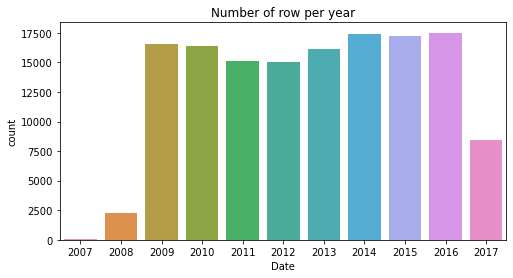

In [38]:
plt.figure(figsize=(8,4))
plt.title("Number of row per year")
sns.countplot(x=Year)

## Komparasi categori Fields

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


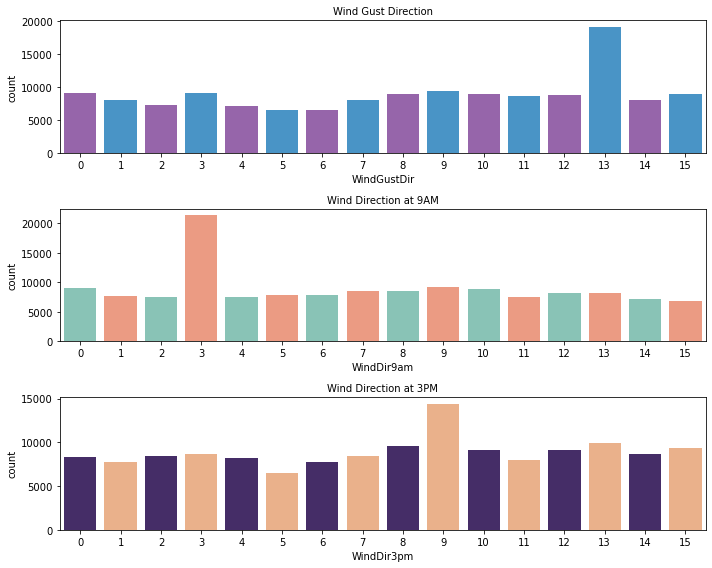

In [39]:
# camparison of WindGustDir, WindDir9am and WindDir3pm

fig, ax = plt.subplots(3, 1, figsize=(10,8))

# WindGustDir
sns.countplot(df['WindGustDir'], palette=['#9b59b6','#3498db'], ax=ax[0])
ax[0].set_title("Wind Gust Direction", fontsize=10)

# WindGustDir
sns.countplot(df['WindDir9am'], palette= ['#7fcdbb' , '#fc9272'], ax=ax[1])
ax[1].set_title("Wind Direction at 9AM", fontsize=10)

# WindGustDir
sns.countplot(df['WindDir3pm'], palette=['#432371',"#FAAE7B"], ax=ax[2])
ax[2].set_title("Wind Direction at 3PM", fontsize=10)
fig.tight_layout()


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Temperature at 3PM')

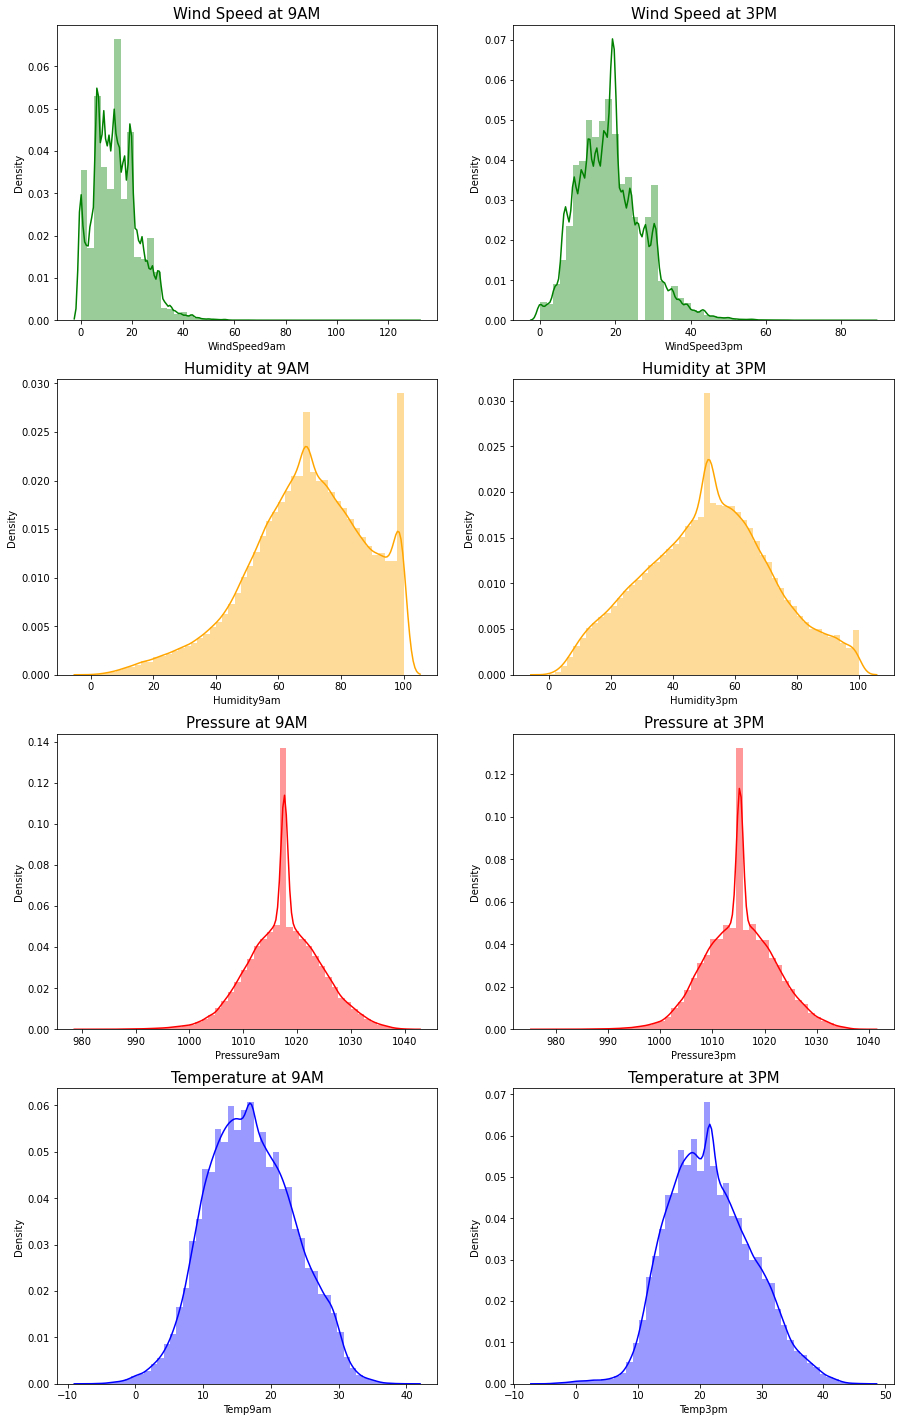

In [40]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))

# WindSpeed9am
sns.distplot(df['WindSpeed9am'], ax=ax[0,0], color='green')
ax[0,0].set_title("Wind Speed at 9AM", fontsize=15)

# WindSpeed3pm
sns.distplot(df['WindSpeed3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title("Wind Speed at 3PM", fontsize=15)

# Humidity9am
sns.distplot(df['Humidity9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title("Humidity at 9AM", fontsize=15)

# Humidity3pm
sns.distplot(df['Humidity3pm'], ax=ax[1,1], color='orange')
ax[1,1].set_title("Humidity at 3PM", fontsize=15)

# Pressure9am
sns.distplot(df['Pressure9am'], ax=ax[2,0], color='red')
ax[2,0].set_title("Pressure at 9AM", fontsize=15)

# Pressure3pm
sns.distplot(df['Pressure3pm'], ax=ax[2,1], color='red')
ax[2,1].set_title("Pressure at 3PM", fontsize=15)

# Temp9am
sns.distplot(df['Temp9am'], ax=ax[3,0], color='blue')
ax[3,0].set_title("Temperature at 9AM", fontsize=15)

# Temp3pm
sns.distplot(df['Temp3pm'], ax=ax[3,1], color='blue')
ax[3,1].set_title("Temperature at 3PM", fontsize=15)

## Komparasi anatara ranfall today dengan tahun

Text(0.5, 1.0, 'Rain Today - Rain Tomorrow')

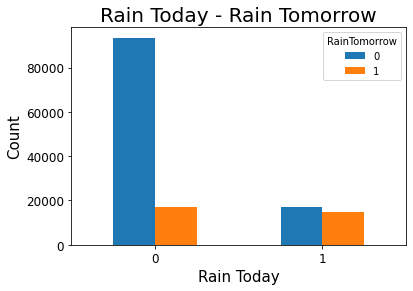

In [41]:
Today_Tomo_plot = pd.crosstab(df['RainToday'], df['RainTomorrow'])

plt.rcParams["figure.figsize"] = (6,4)

Today_Tomo_plot.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)

# Data Preprocessing

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df['Location']= label_encoder.fit_transform(df['Location'])
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [27]:
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [28]:
df_encoded = pd.get_dummies(df, columns=cat_columns)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


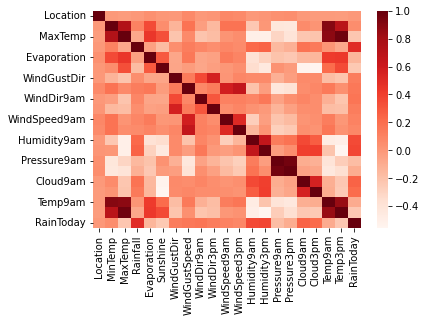

In [29]:
# cek korelasi antar variable independent
matriks_korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Reds');

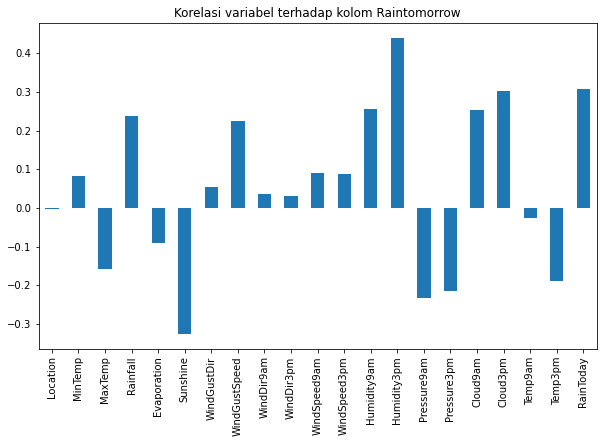

In [30]:
# Membuat correlation bar(mencari korelasi antara variable dependent dengan semua variable independent) plot dan correlation matrix(mencari korelasi antar variable independent)
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corrwith(df.RainTomorrow)
korelasi.plot.bar(title='Korelasi variabel terhadap kolom Raintomorrow');

In [31]:
new_df =df[['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday','RainTomorrow']]
new_df.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,8.000000,4.503167,0,0
1,2,7.4,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,4.437189,4.503167,0,0
2,2,12.9,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,4.437189,2.000000,0,0
3,2,9.2,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,4.437189,4.503167,0,0
4,2,17.5,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,7.000000,8.000000,0,0


# Pendefisian Model

In [32]:
model1 = LogisticRegression()
model2 = SVC()

# Pelatihan Model

# Evaluasi Model

# Model Inference